In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

/Users/reefayatbinshahjahan/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df1 = pd.read_csv('realtor-data.zip.csv')
df1.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
#dropping irrelevant features 

df2 = df1.drop(['brokered_by', 'status', 'acre_lot', 'street', 'zip_code', 'prev_sold_date'], axis= 1)

In [6]:
df2.head()

,price,bed,bath,city,state,house_size
0,105000.0,3.0,2.0,Adjuntas,Puerto Rico,920.0
1,80000.0,4.0,2.0,Adjuntas,Puerto Rico,1527.0
2,67000.0,2.0,1.0,Juana Diaz,Puerto Rico,748.0
3,145000.0,4.0,2.0,Ponce,Puerto Rico,1800.0
4,65000.0,6.0,2.0,Mayaguez,Puerto Rico,NaN


In [7]:
df2.isnull().sum()

price           1541
bed           481317
bath          511771
city            1407
state              8
house_size    568484
dtype: int64

In [8]:
df3 = df2.dropna()

In [9]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']/ df4['house_size']
df4.head()

,price,bed,bath,city,state,house_size,price_per_sqft
0,105000.0,3.0,2.0,Adjuntas,Puerto Rico,920.0,114.130435
1,80000.0,4.0,2.0,Adjuntas,Puerto Rico,1527.0,52.390308
2,67000.0,2.0,1.0,Juana Diaz,Puerto Rico,748.0,89.572193
3,145000.0,4.0,2.0,Ponce,Puerto Rico,1800.0,80.555556
5,179000.0,4.0,3.0,San Sebastian,Puerto Rico,2520.0,71.031746


In [10]:
df5 = df4[df4['state'] == 'California']

In [11]:
df5

,price,bed,bath,city,state,house_size,price_per_sqft
160666,3.000000e+06,7.0,6.0,Balzola,California,6889.0,4.354768e+02
221994,2.147484e+09,2.0,2.0,International,California,885.0,2.426535e+06
1208977,1.999000e+05,3.0,1.0,Blythe,California,1014.0,1.971400e+02
1208998,1.729990e+05,3.0,2.0,Blythe,California,1132.0,1.528260e+02
1209109,7.990000e+04,4.0,2.0,Blythe,California,1272.0,6.281447e+01
...,...,...,...,...,...,...,...
2177843,4.594000e+05,3.0,1.0,South Lake Tahoe,California,1160.0,3.960345e+02
2177844,9.480000e+05,6.0,6.0,South Lake Tahoe,California,3757.0,2.523290e+02
2177849,8.500000e+05,4.0,3.0,South Lake Tahoe,California,1956.0,4.345603e+02
2177857,9.590000e+05,4.0,3.0,South Lake Tahoe,California,1824.0,5.257675e+02


In [12]:
df5['city'] = df5['city'].apply(lambda x: x.strip())
city_stats = df5['city'].value_counts(ascending=False)
city_stats

/var/folders/96/yvf7rjpn43l1z9js44skncv00000gn/T/ipykernel_5902/1464222537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['city'] = df5['city'].apply(lambda x: x.strip())


city
Los Angeles           7783
San Diego             6752
Sacramento            5447
San Jose              4697
San Francisco         3556
                      ... 
Larabee Valley           1
Somes Bar                1
Hoopa                    1
Orick                    1
Blairsden Graeagle       1
Name: count, Length: 1353, dtype: int64

In [13]:
city_stats2 = city_stats[city_stats<=10]
city_stats2

city
Point Loma            10
Rimforest             10
Graeagle              10
Santa Ysabel          10
Onyx                  10
                      ..
Larabee Valley         1
Somes Bar              1
Hoopa                  1
Orick                  1
Blairsden Graeagle     1
Name: count, Length: 516, dtype: int64

In [14]:
df5['city'] = df5['city'].apply(lambda x: 'other' if x in city_stats2 else x)
len(df5['city'].unique())

/var/folders/96/yvf7rjpn43l1z9js44skncv00000gn/T/ipykernel_5902/3293351542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['city'] = df5['city'].apply(lambda x: 'other' if x in city_stats2 else x)


838

In [15]:
df5.head(10)

,price,bed,bath,city,state,house_size,price_per_sqft
160666,3.000000e+06,7.0,6.0,other,California,6889.0,4.354768e+02
221994,2.147484e+09,2.0,2.0,other,California,885.0,2.426535e+06
1208977,1.999000e+05,3.0,1.0,Blythe,California,1014.0,1.971400e+02
1208998,1.729990e+05,3.0,2.0,Blythe,California,1132.0,1.528260e+02
1209109,7.990000e+04,4.0,2.0,Blythe,California,1272.0,6.281447e+01
1209110,6.900000e+04,3.0,1.0,Blythe,California,1134.0,6.084656e+01
1209111,7.500000e+04,3.0,2.0,Blythe,California,1248.0,6.009615e+01
1209113,2.010000e+05,2.0,2.0,Blythe,California,1100.0,1.827273e+02
1209114,1.199990e+05,4.0,2.0,Blythe,California,1680.0,7.142798e+01
1209115,1.899000e+05,4.0,2.0,Blythe,California,1691.0,1.123004e+02


In [16]:
df5[df5['city']=='Los Angeles']

,price,bed,bath,city,state,house_size,price_per_sqft
1256857,260000.0,3.0,3.0,Los Angeles,California,1574.0,165.184244
1256858,439000.0,2.0,1.0,Los Angeles,California,816.0,537.990196
1256859,500000.0,2.0,1.0,Los Angeles,California,886.0,564.334086
1256861,580000.0,4.0,1.0,Los Angeles,California,1290.0,449.612403
1256862,490000.0,2.0,1.0,Los Angeles,California,864.0,567.129630
...,...,...,...,...,...,...,...
2118688,1650000.0,2.0,3.0,Los Angeles,California,2718.0,607.064018
2118726,1950000.0,4.0,3.0,Los Angeles,California,2299.0,848.194867
2118790,1979000.0,3.0,3.0,Los Angeles,California,2543.0,778.214707
2118811,749999.0,3.0,2.0,Los Angeles,California,1456.0,515.109203


In [17]:
df6 = df5[~(df5['house_size']/df5['bed']<300)]

In [18]:
df6

,price,bed,bath,city,state,house_size,price_per_sqft
160666,3.000000e+06,7.0,6.0,other,California,6889.0,4.354768e+02
221994,2.147484e+09,2.0,2.0,other,California,885.0,2.426535e+06
1208977,1.999000e+05,3.0,1.0,Blythe,California,1014.0,1.971400e+02
1208998,1.729990e+05,3.0,2.0,Blythe,California,1132.0,1.528260e+02
1209109,7.990000e+04,4.0,2.0,Blythe,California,1272.0,6.281447e+01
...,...,...,...,...,...,...,...
2177843,4.594000e+05,3.0,1.0,South Lake Tahoe,California,1160.0,3.960345e+02
2177844,9.480000e+05,6.0,6.0,South Lake Tahoe,California,3757.0,2.523290e+02
2177849,8.500000e+05,4.0,3.0,South Lake Tahoe,California,1956.0,4.345603e+02
2177857,9.590000e+05,4.0,3.0,South Lake Tahoe,California,1824.0,5.257675e+02


In [19]:
df6['price_per_sqft'].describe()

count    1.897960e+05
mean     5.443668e+02
std      5.694712e+03
min      5.425936e-04
25%      3.059537e+02
50%      4.450404e+02
75%      6.460798e+02
max      2.426535e+06
Name: price_per_sqft, dtype: float64

In [20]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('city'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft']>(m-st)) & (subdf['price_per_sqft']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(151970, 7)

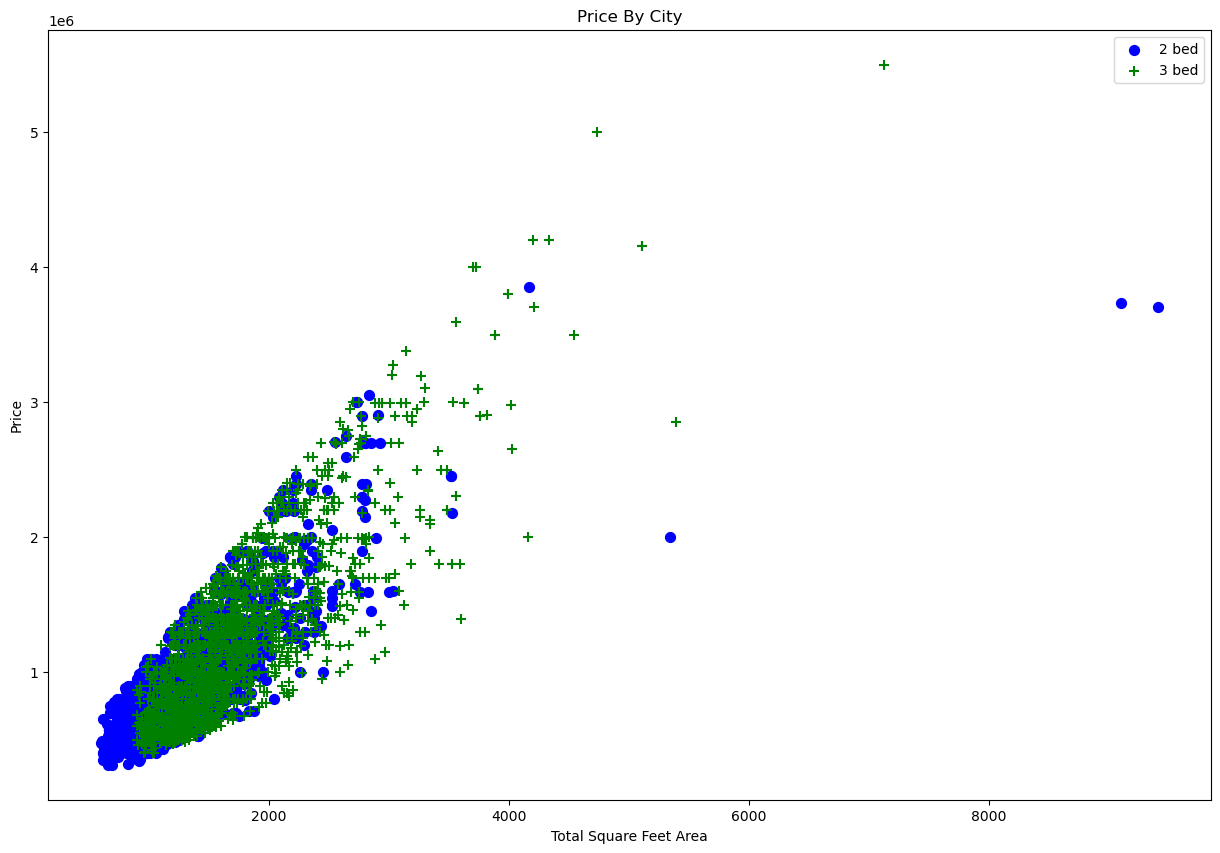

In [21]:
def plot_scatter_chart(df,city):
    bed2 = df[(df['city']==city) & (df['bed']==2)]
    bed3 = df[(df['city']==city) & (df['bed']==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bed2['house_size'],bed2['price'],color='blue',label='2 bed', s=50)
    plt.scatter(bed3['house_size'],bed3['price'],marker='+', color='green',label='3 bed', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title('Price By City')
    plt.legend()
    
plot_scatter_chart(df7,"Los Angeles")

In [22]:
def remove_bed_outliers(df):
    exclude_indices = np.array([])
    for city, cityDf in df.groupby('city'):
        bed_stats = {}
        for bed, bedDf in cityDf.groupby('bed'):
            bed_stats[bed] = {
                'mean': np.mean(bedDf['price_per_sqft']),
                'std': np.std(bedDf['price_per_sqft']),
                'count': bedDf.shape[0]
            }
        for bed, bedDf in cityDf.groupby('bed'):
            stats = bed_stats.get(bed-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedDf[bedDf['price_per_sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bed_outliers(df7)
# df8 = df7.copy()
df8.shape

(77442, 7)

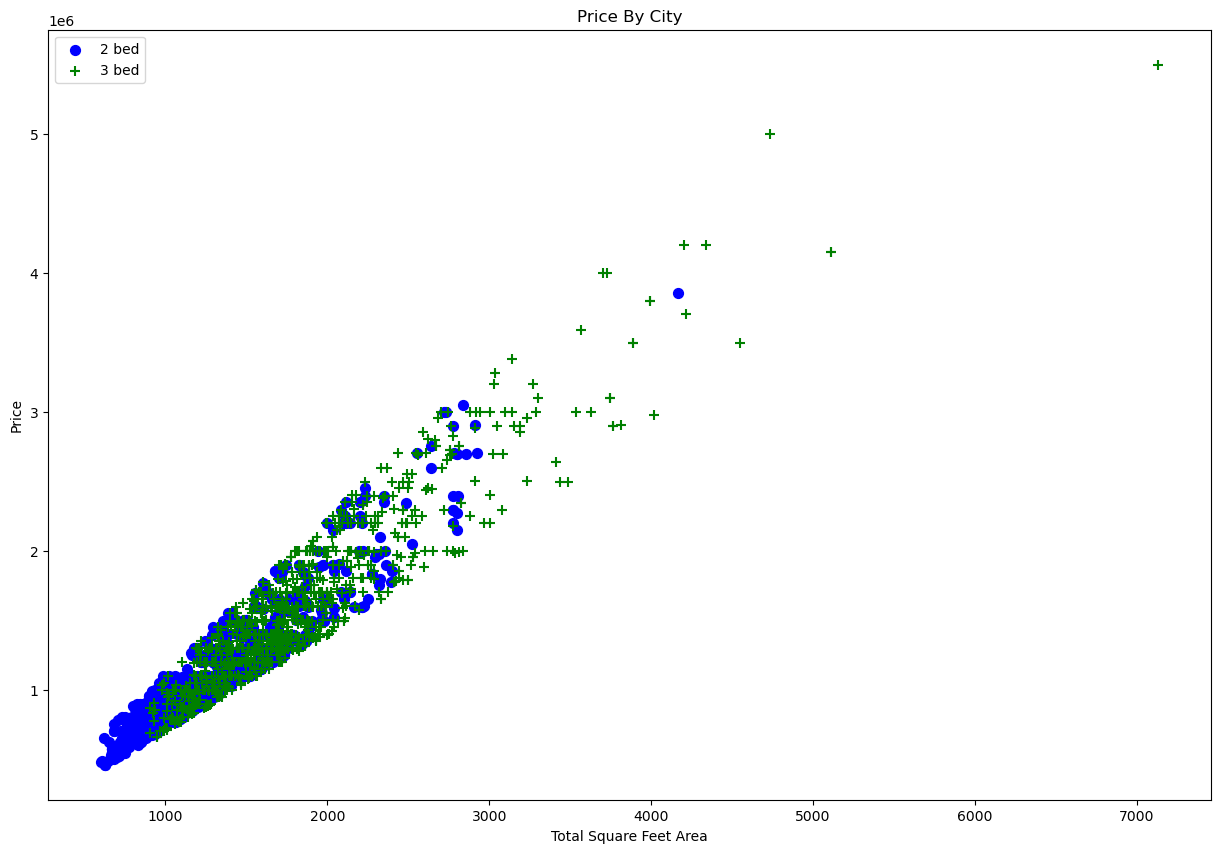

In [23]:
plot_scatter_chart(df8,"Los Angeles")

Text(0, 0.5, 'Count')

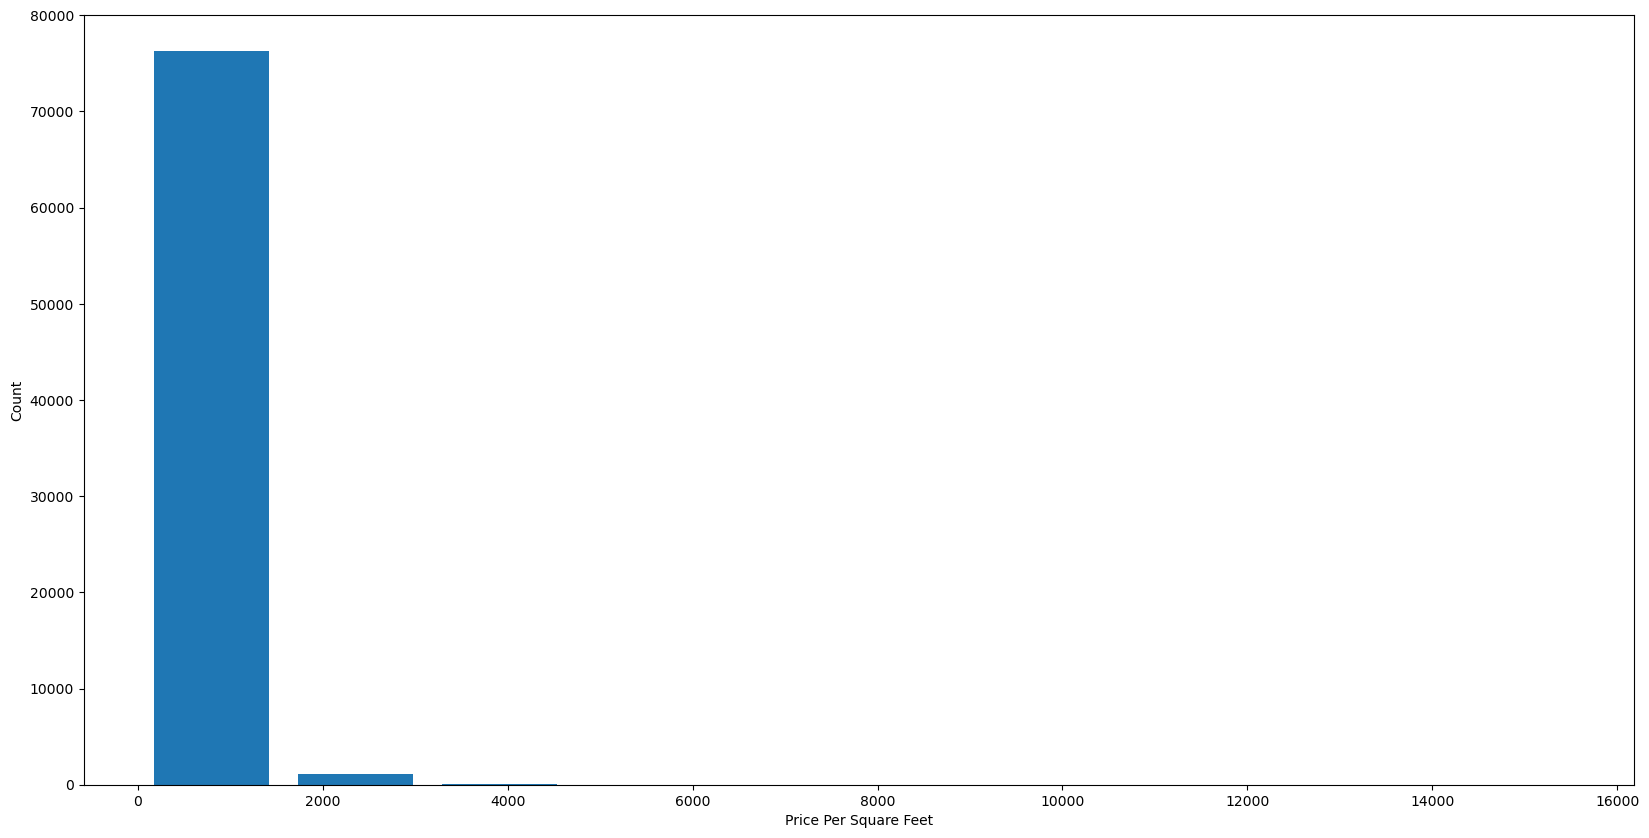

In [24]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8['price_per_sqft'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [25]:
dummies = pd.get_dummies(df8['city'])

In [26]:
dummies.head()

,Acampo,Acton,Adelanto,Agoura Hills,Agua Dulce,Aguanga,Ahwahnee,Alameda,Alamo,Albany,...,Woodland,Woodland Hills,Woodside,Wrightwood,Yorba Linda,Yreka,Yuba City,Yucaipa,Yucca Valley,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
df9 = pd.concat([df8, dummies.drop('other', axis = 1)], axis=1)
df9.head()

,price,bed,bath,city,state,house_size,price_per_sqft,Acampo,Acton,Adelanto,...,Woodlake,Woodland,Woodland Hills,Woodside,Wrightwood,Yorba Linda,Yreka,Yuba City,Yucaipa,Yucca Valley
0,739900.0,3.0,3.0,Acampo,California,2043.0,362.163485,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,607777.0,3.0,2.0,Acampo,California,1566.0,388.107918,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,499950.0,3.0,1.0,Acampo,California,1160.0,430.991379,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,458888.0,3.0,1.0,Acampo,California,1319.0,347.905989,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,519000.0,3.0,2.0,Acampo,California,1344.0,386.160714,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
df10 = df9.drop('city', axis=1)
df10.head()

,price,bed,bath,state,house_size,price_per_sqft,Acampo,Acton,Adelanto,Agoura Hills,...,Woodlake,Woodland,Woodland Hills,Woodside,Wrightwood,Yorba Linda,Yreka,Yuba City,Yucaipa,Yucca Valley
0,739900.0,3.0,3.0,California,2043.0,362.163485,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,607777.0,3.0,2.0,California,1566.0,388.107918,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,499950.0,3.0,1.0,California,1160.0,430.991379,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,458888.0,3.0,1.0,California,1319.0,347.905989,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,519000.0,3.0,2.0,California,1344.0,386.160714,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
df11 = df10.drop('price_per_sqft', axis=1)

In [30]:
df11

,price,bed,bath,state,house_size,Acampo,Acton,Adelanto,Agoura Hills,Agua Dulce,...,Woodlake,Woodland,Woodland Hills,Woodside,Wrightwood,Yorba Linda,Yreka,Yuba City,Yucaipa,Yucca Valley
0,739900.0,3.0,3.0,California,2043.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,607777.0,3.0,2.0,California,1566.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,499950.0,3.0,1.0,California,1160.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,458888.0,3.0,1.0,California,1319.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,519000.0,3.0,2.0,California,1344.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151960,85000.0,1.0,1.0,California,576.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
151962,1370000.0,4.0,3.0,California,3000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
151963,1050000.0,3.0,3.0,California,1932.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
151967,1150000.0,3.0,3.0,California,1793.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
df12 = df11.drop('state', axis=1)

In [32]:
df12

,price,bed,bath,house_size,Acampo,Acton,Adelanto,Agoura Hills,Agua Dulce,Aguanga,...,Woodlake,Woodland,Woodland Hills,Woodside,Wrightwood,Yorba Linda,Yreka,Yuba City,Yucaipa,Yucca Valley
0,739900.0,3.0,3.0,2043.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,607777.0,3.0,2.0,1566.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,499950.0,3.0,1.0,1160.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,458888.0,3.0,1.0,1319.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,519000.0,3.0,2.0,1344.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151960,85000.0,1.0,1.0,576.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
151962,1370000.0,4.0,3.0,3000.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
151963,1050000.0,3.0,3.0,1932.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
151967,1150000.0,3.0,3.0,1793.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
X = df12.drop('price', axis=1)

In [34]:
Y = df12['price']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)


In [36]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

0.7835570056323502

In [37]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.79386667, 0.80409539, 0.72593279, 0.78990842, 0.79018001])

In [38]:
## Grid Search CV

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def find_best_model(X, Y):

    algo = {
        'Linear_Regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()), 
                ('regressor', LinearRegression())]),
            'params': {
                'regressor__fit_intercept': [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }

    }

    scores = []

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algoName, config in algo.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model' : algoName,
            'best_score' : gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [42]:
# find_best_model(X, Y)

X.columns


Index(['bed', 'bath', 'house_size', 'Acampo', 'Acton', 'Adelanto',
       'Agoura Hills', 'Agua Dulce', 'Aguanga', 'Ahwahnee',
       ...
       'Woodlake', 'Woodland', 'Woodland Hills', 'Woodside', 'Wrightwood',
       'Yorba Linda', 'Yreka', 'Yuba City', 'Yucaipa', 'Yucca Valley'],
      dtype='object', length=840)

In [43]:
def predict_price(city,house_size,bath,bed):    
    city_index = np.where(X.columns==city)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bed
    x[1] = bath
    x[2] = house_size
    if city_index >= 0:
        x[city_index] = 1

    return lr.predict([x])[0]

In [55]:
predict_price('Palo Alto', 1000, 2, 2)

/Users/reefayatbinshahjahan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3038346.529211263

In [56]:
#import model
import pickle
with open('California_RealEstate_model.pickle', 'wb') as f:
    pickle.dump(lr,f)


In [57]:
import json

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))
